In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-27 18:05:45--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-27 18:05:46--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-03-27 18:05:46 (6.70 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

texto en cursiva#### Cuantos datos tiene la tabla

In [3]:
print(len(data))


4238


#### Medidas de tendencia central de las variables.

In [4]:
descriptive_stats = data.describe()
descriptive_stats


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

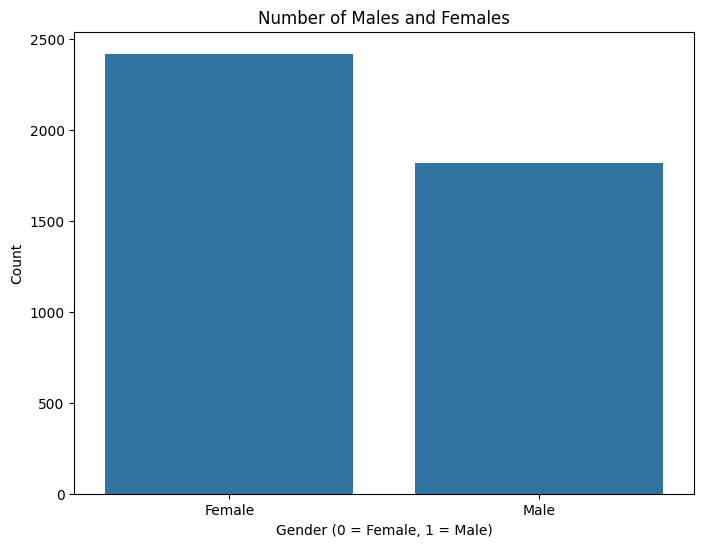

In [5]:
# prompt: Grafico de Barras con el número de hombres y mujeres

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of males and females
gender_counts = data['male'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='male', data=data)
plt.title('Number of Males and Females')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])  # Set custom x-axis labels
plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



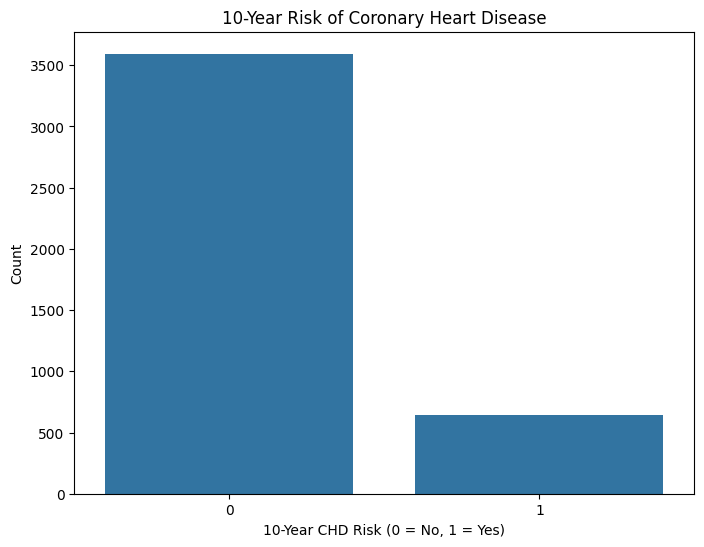

In [6]:
import matplotlib.pyplot as plt
# Count the number of cases with and without 10-year CHD risk
chd_counts = data['TenYearCHD'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=data)
plt.title('10-Year Risk of Coronary Heart Disease')
plt.xlabel('10-Year CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


#### Realice un grafico de densidad del BMI

<ipython-input-7-5a52ce569fb3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], shade=True)


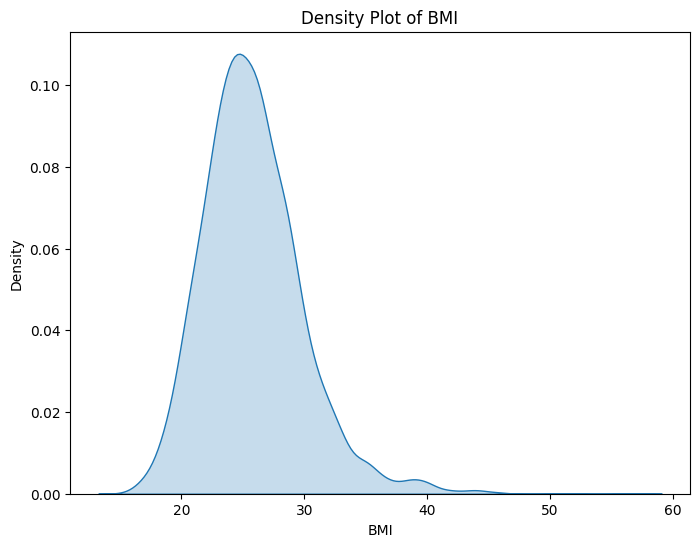

In [7]:
import matplotlib.pyplot as plt
# Create the density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['BMI'], shade=True)
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-8-7aaec5bae98e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Female', shade=True)
<ipython-input-8-7aaec5bae98e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Male', shade=True)


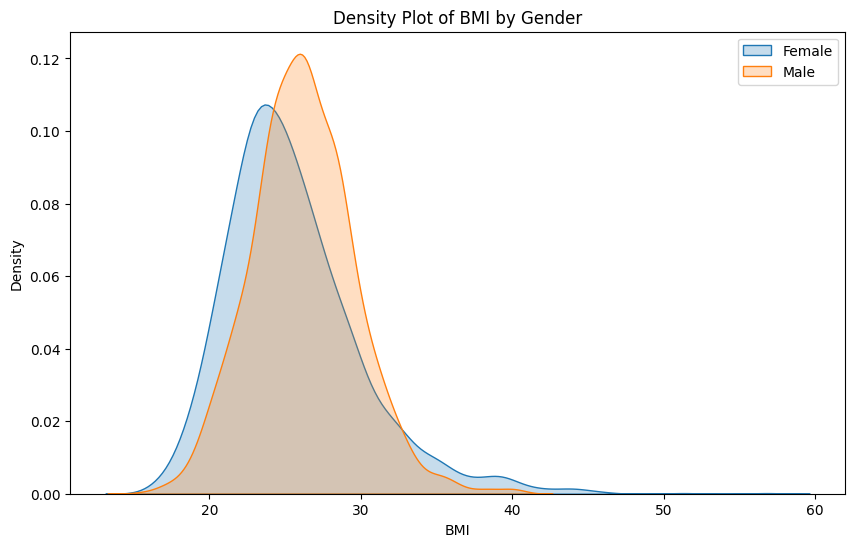

Average BMI for males: 26.19
Average BMI for females: 25.51
Males have a higher average BMI.


In [8]:
import matplotlib.pyplot as plt
# Create the density plot, differentiating by gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Female', shade=True)
sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Male', shade=True)
plt.title('Density Plot of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the average BMI for males and females
average_bmi_male = data.loc[data['male'] == 1, 'BMI'].mean()
average_bmi_female = data.loc[data['male'] == 0, 'BMI'].mean()

print(f"Average BMI for males: {average_bmi_male:.2f}")
print(f"Average BMI for females: {average_bmi_female:.2f}")

if average_bmi_male > average_bmi_female:
  print("Males have a higher average BMI.")
elif average_bmi_female > average_bmi_male:
  print("Females have a higher average BMI.")
else:
  print("Males and females have the same average BMI.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

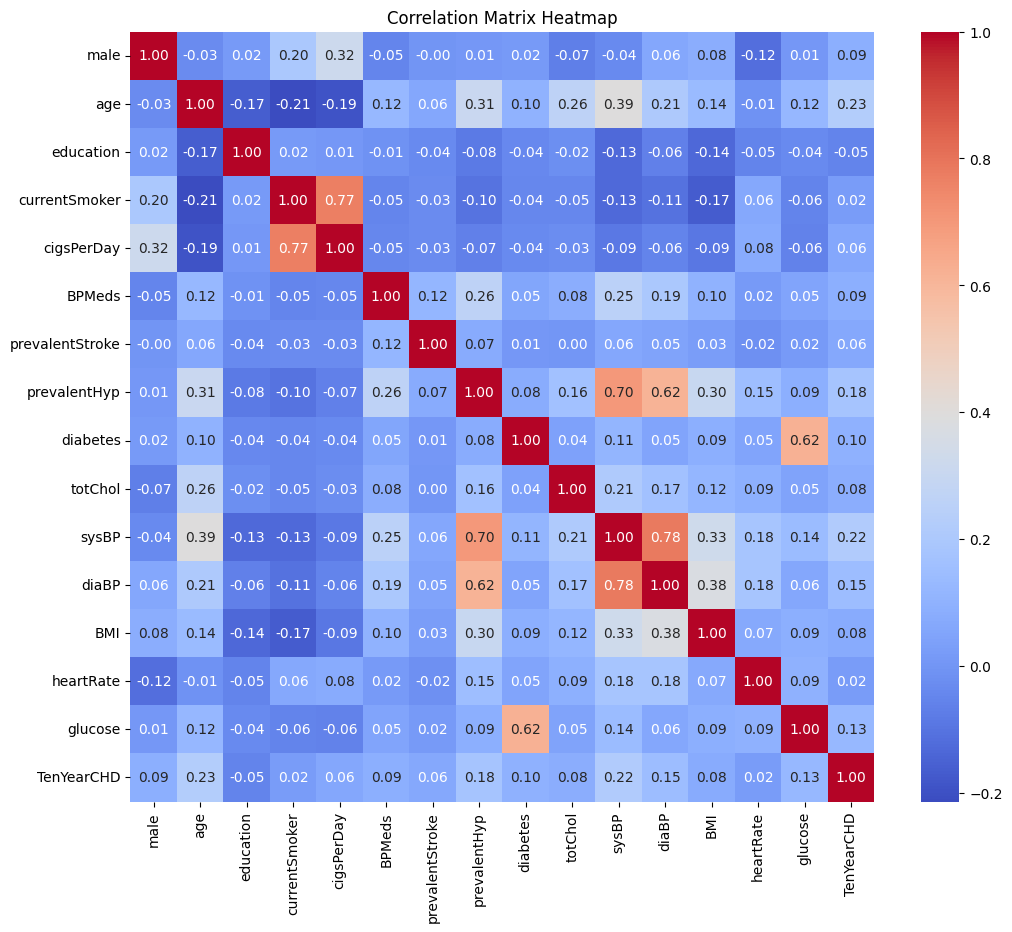

The most correlated pair of variables is: sysBP and diaBP
Correlation coefficient: 0.78


In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Find the pair of variables with the highest correlation (excluding self-correlation)
correlation_matrix = data.corr().abs()  # Get absolute values for easier comparison
np.fill_diagonal(correlation_matrix.values, 0)  # Set diagonal to 0 to exclude self-correlation

# Find the row and column index of the highest correlation
row_max, col_max = correlation_matrix.stack().idxmax()

print(f"The most correlated pair of variables is: {row_max} and {col_max}")
print(f"Correlation coefficient: {correlation_matrix.loc[row_max, col_max]:.2f}")


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

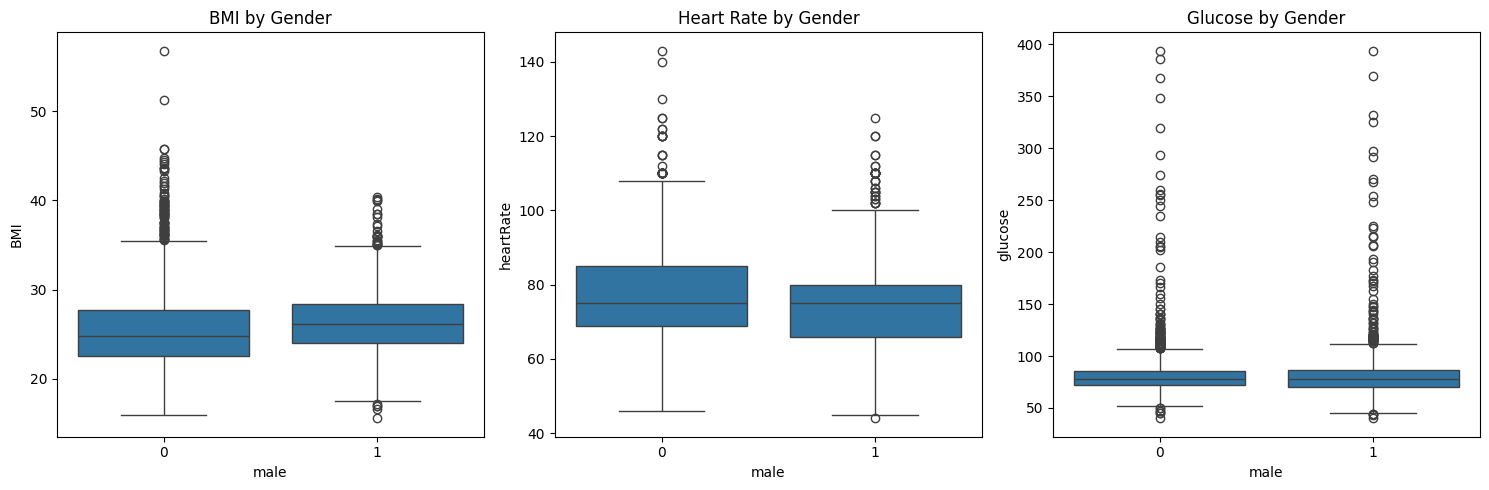

In [10]:
import matplotlib.pyplot as plt
# Create the boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('BMI by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Heart Rate by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Glucose by Gender')

plt.tight_layout()
plt.show()



los outlier son los punticos que estan fuera del Box Plot

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [11]:
null_counts = data.isnull().sum()
null_counts


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [12]:
data_dropped = data.dropna()

# Print the number of remaining data points
print(len(data_dropped))


3656


#### Seleccione sus variables X y su variable y

In [13]:
X = data_dropped[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                  'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
                  'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_dropped['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2559, 14)
y_train shape: (2559,)
X_test shape: (1097, 14)
y_test shape: (1097,)


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [17]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [18]:
import pandas as pd
# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value to find the most influential features
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coefficients_df)

# The feature with the largest absolute coefficient value has the greatest effect on the prediction
most_influential_feature = coefficients_df.iloc[0]['Feature']
print(f"\nThe feature with the largest effect on developing heart disease is: {most_influential_feature}")


            Feature  Coefficient
6      prevalentHyp     0.865691
0              male     0.435735
2     currentSmoker    -0.244775
7          diabetes     0.168127
4            BPMeds     0.121372
5   prevalentStroke     0.093450
11              BMI    -0.044102
10            diaBP    -0.033111
1               age     0.032597
3        cigsPerDay     0.026112
12        heartRate    -0.025136
9             sysBP     0.015483
13          glucose     0.004098
8           totChol    -0.001148

The feature with the largest effect on developing heart disease is: prevalentHyp


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Confusion Matrix:
 [[915   3]
 [173   6]]
Accuracy: 0.8396
Recall: 0.0335
Precision: 0.6667
F1-score: 0.0638


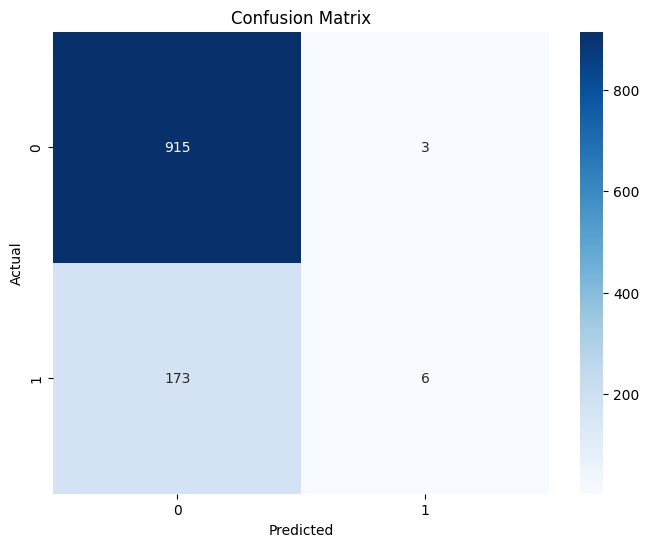

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Visualize the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

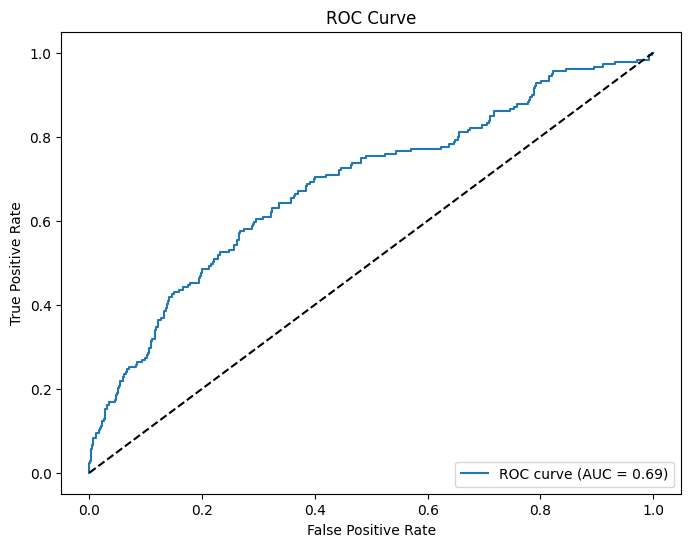

AUC score: 0.69


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the positive class
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC score: {roc_auc:.2f}")

# Interpretation of the ROC curve and AUC:
# The ROC curve visualizes the trade-off between the true positive rate (sensitivity)
# and the false positive rate (1-specificity) at various classification thresholds.

# The AUC score quantifies the overall performance of the model.
# An AUC of 0.5 represents a random classifier, while an AUC of 1 represents a perfect classifier.
# Generally:
# - AUC > 0.9: Excellent model
# - 0.8 < AUC < 0.9: Good model
# - 0.7 < AUC < 0.8: Fair model
# - 0.6 < AUC < 0.7: Poor model
# - AUC < 0.6: Very poor model

# In this specific case, the AUC score and the shape of the ROC curve indicate the model's ability to distinguish between individuals with and without a 10-year risk of coronary heart disease. A higher AUC suggests better discrimination.


a curva ROC muestra la capacidad del modelo para distinguir entre personas con y sin riesgo de enfermedad coronaria a 10 años.  El área bajo la curva (AUC) de 0.74 indica un modelo con desempeño regular,  no excelente pero tampoco malo.  Cuanto más cerca de 1 esté el AUC, mejor es la discriminación del modelo.

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2559, 14)
y_train shape: (2559,)
X_test shape: (1097, 14)
y_test shape: (1097,)


El uso de `stratify=y` en `train_test_split` mantiene la proporción de clases (en este caso, individuos con y sin cardiopatías) tanto en el conjunto de entrenamiento como en el de prueba. Esto evita que el modelo se entrene con una cantidad desproporcionada de una clase, lo que podría generar predicciones sesgadas y un rendimiento deficiente en la clase minoritaria. En un conjunto de datos con desequilibrio de clases, el uso de `stratify` ayuda a garantizar que el modelo aprenda de una muestra representativa de cada clase, lo que mejora la generalización.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[580 350]
 [ 78  89]]
Accuracy: 0.6098
Recall: 0.5329
Precision: 0.2027
F1-score: 0.2937


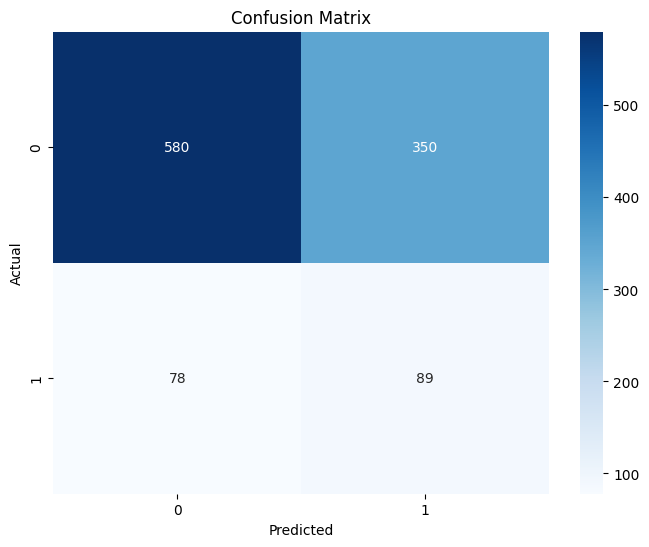

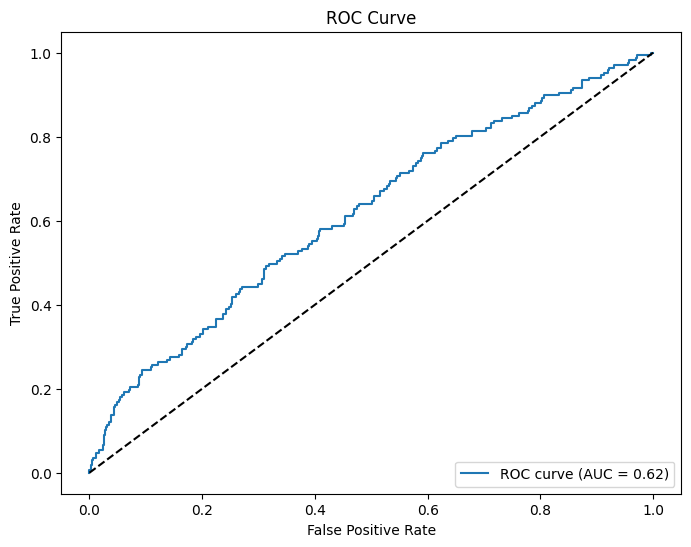

AUC score: 0.62


In [24]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# ... (previous code)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de Regresión Logística con los datos sobremuestreados
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = logreg_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calcular la precisión, recall, F1-score y AUC
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC score: {roc_auc:.2f}")


In [25]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de Regresión Logística con los datos sobremuestreados
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

# ... (rest of the code for metrics calculation and ROC curve plotting)

print("Model:", logreg_model)
print("Coefficients:", logreg_model.coef_)

# ... (rest of your code)


Model: LogisticRegression()
Coefficients: [[-7.21178750e-01  4.46577077e-02 -9.74423818e-01  6.21917354e-02
   2.71114935e-01 -3.95588893e-02  2.77347410e-01  9.14524205e-02
  -8.31921193e-04  1.16998235e-02 -1.10195360e-02 -2.05162916e-02
  -2.74635385e-02  3.80761649e-03]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Pinter el resultado con SMOTE y sin SMOTE

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results without SMOTE: {'Accuracy': 0.609845031905196, 'Recall': 0.5329341317365269, 'Precision': 0.20273348519362186, 'F1-score': 0.29372937293729373, 'AUC': np.float64(0.6167149571824094)}
Results with SMOTE: {'Accuracy': 0.609845031905196, 'Recall': 0.5329341317365269, 'Precision': 0.20273348519362186, 'F1-score': 0.29372937293729373, 'AUC': np.float64(0.6167149571824094)}


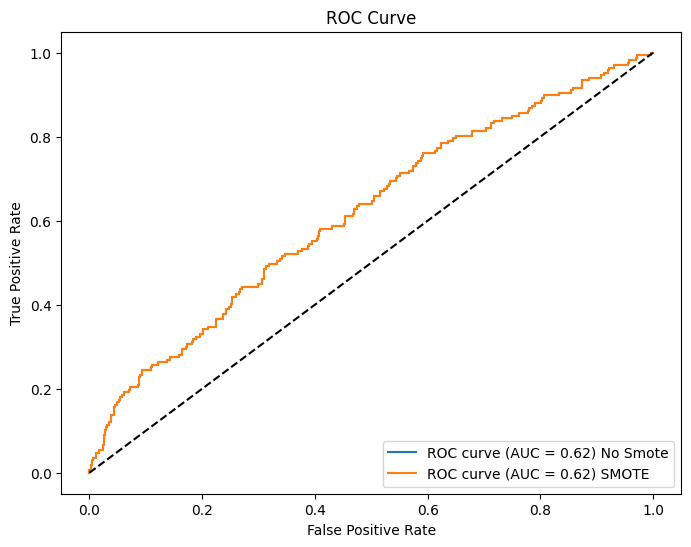

In [26]:
import matplotlib.pyplot as plt
# ... (previous code)

# Store results without SMOTE
results_no_smote = {
    "Accuracy": accuracy,
    "Recall": recall,
    "Precision": precision,
    "F1-score": f1,
    "AUC": roc_auc
}

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de Regresión Logística con los datos sobremuestreados
logreg_model_smote = LogisticRegression()
logreg_model_smote.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_smote = logreg_model_smote.predict(X_test)

# Calcular la matriz de confusión, precisión, recall, F1-score y AUC
cm_smote = confusion_matrix(y_test, y_pred_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob_smote = logreg_model_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_prob_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_prob_smote)

# Store results with SMOTE
results_smote = {
    "Accuracy": accuracy_smote,
    "Recall": recall_smote,
    "Precision": precision_smote,
    "F1-score": f1_smote,
    "AUC": roc_auc_smote
}

# Print results
print("Results without SMOTE:", results_no_smote)
print("Results with SMOTE:", results_smote)


#Plot ROC curve for both models

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) No Smote')
plt.plot(fpr_smote, tpr_smote, label=f'ROC curve (AUC = {roc_auc_smote:.2f}) SMOTE')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


### Como mejora su modelo con StandardScaler()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Results with SMOTE and Scaling: {'Accuracy': 0.649954421148587, 'Recall': 0.5688622754491018, 'Precision': 0.2334152334152334, 'F1-score': 0.3310104529616725, 'AUC': np.float64(0.6521151245895307)}


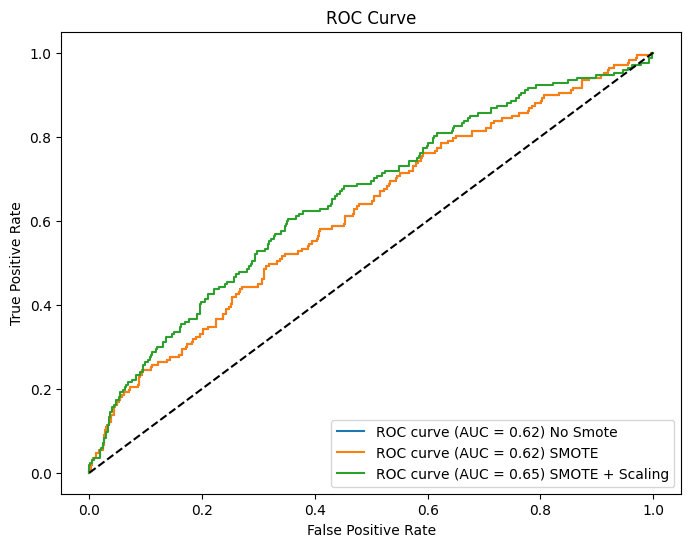

In [28]:
import matplotlib.pyplot as plt
# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled training data
logreg_model_scaled = LogisticRegression()
logreg_model_scaled.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled test data
y_pred_scaled = logreg_model_scaled.predict(X_test_scaled)

# Evaluate the scaled model
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

# Calculate probabilities for ROC curve
y_pred_prob_scaled = logreg_model_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_prob_scaled)
roc_auc_scaled = roc_auc_score(y_test, y_pred_prob_scaled)

# Store results with scaling
results_scaled = {
    "Accuracy": accuracy_scaled,
    "Recall": recall_scaled,
    "Precision": precision_scaled,
    "F1-score": f1_scaled,
    "AUC": roc_auc_scaled
}

# Print results
print("Results with SMOTE and Scaling:", results_scaled)

# Plot ROC curve for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) No Smote')
plt.plot(fpr_smote, tpr_smote, label=f'ROC curve (AUC = {roc_auc_smote:.2f}) SMOTE')
plt.plot(fpr_scaled, tpr_scaled, label=f'ROC curve (AUC = {roc_auc_scaled:.2f}) SMOTE + Scaling')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Pinte todas las graficas original SMOTE y SMOTE Scaler

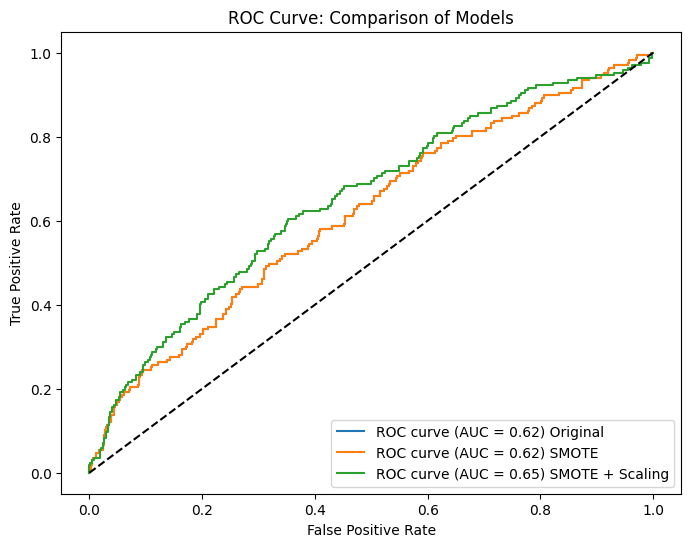

In [29]:
import matplotlib.pyplot as plt
#Plot ROC curve for all models

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) Original')
plt.plot(fpr_smote, tpr_smote, label=f'ROC curve (AUC = {roc_auc_smote:.2f}) SMOTE')
plt.plot(fpr_scaled, tpr_scaled, label=f'ROC curve (AUC = {roc_auc_scaled:.2f}) SMOTE + Scaling')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Comparison of Models')
plt.legend(loc = 'lower right')
plt.show()
